# VGG-16 Improvement
* Adding more layers ($350$ vs. $256$) did not improve the perfomance.
* Also adding one more dense layer does not bring any benefit.
* Reducing the number of neurons in the dense layer did not lead to any improvement.
* Batch Normalization idem.


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
%cd /gdrive/My Drive/University/Artificial Neural Networks and Deep Learning Exercises/ANNDL-H1/Christian Spano Folder/Pre-Trained Models

/gdrive/.shortcut-targets-by-id/1ZfYa9Xtbi6bxURrHSnWZqE9FXmV_9dMl/ANNDL-H1/Christian Spano Folder/Pre-Trained Models


### Install some modules

In [4]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 4.6 MB/s 


### Import the needed (external) libraries

In [5]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow import keras
import visualkeras
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


### Import personal libraries

In [6]:
import sys
sys.path.insert(0, '/gdrive/My Drive/University/Artificial Neural Networks and Deep Learning Exercises/ANNDL-H1/Christian Spano Folder/Utils')
from DatasetHelper import DatasetHelper
from ModelHelper import ModelHelper

## Helper Configuration
Configure the helper classes by setting a seed and the root folder path.

### Define some useful constants

In [7]:
seed = 42
labels = {0: 'Species1', 1: 'Species2', 2: 'Species3', 3: 'Species4',4: 'Species5', 5: 'Species6', 6: 'Species7', 7: 'Species8'}
dataset_folder = "../../"
models_folder = "../Local Files"

### Dataset Configuration

In [8]:
dataset_helper = DatasetHelper(dataset_folder, seed)

### Models Configuration

In [9]:
model_helper = ModelHelper(models_folder, labels) #take in input local models folder and lables
model_helper.create_seed(tf, seed);

# Loading the dataset

In [10]:
# Load Dataset
X, Y = dataset_helper.load_dataset_from_numpy()

dataset_size = X.shape[0]
print("Dataset Size: ", dataset_size)

#SPLIT and NORMALIZE OUR DATASET
X_train, X_test, X_val, Y_train, Y_test, Y_val = dataset_helper.split_and_normalize(X, Y, split_test=0.1, split_val=0.1, normalization_mode=1)

#GENERATE 3000 new images
X_train, Y_train = dataset_helper.apply_data_augmentation_with_classes_distribution(X_train, Y_train, 1000, [0.3, 0.05, 0.05, 0.05, 0.05, 0.3, 0.05, 0.05])


Dataset Size:  3542
Data Augmentation with data distribution
Data distribution = [0.3, 0.05, 0.05, 0.05, 0.05, 0.3, 0.05, 0.05]


  0%|          | 0/8 [00:00<?, ?it/s]

Class Size :  151, generating: 300



 12%|█▎        | 1/8 [00:01<00:09,  1.43s/it]

279 images generated
Class Size :  432, generating: 50



100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


32 images generated


 25%|██▌       | 2/8 [00:01<00:05,  1.18it/s]

Class Size :  419, generating: 50



 38%|███▊      | 3/8 [00:02<00:03,  1.57it/s]

32 images generated
Class Size :  415, generating: 50



 50%|█████     | 4/8 [00:02<00:02,  1.77it/s]

32 images generated
Class Size :  431, generating: 50



100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


32 images generated


 62%|██████▎   | 5/8 [00:03<00:01,  1.92it/s]

Class Size :  181, generating: 300



 75%|███████▌  | 6/8 [00:05<00:02,  1.04s/it]

277 images generated
Class Size :  436, generating: 50



 88%|████████▊ | 7/8 [00:05<00:00,  1.18it/s]

32 images generated
Class Size :  413, generating: 50



100%|██████████| 1/1 [00:00<00:00,  4.49it/s]


32 images generated


100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


# Target Classes Visualization

In [ ]:
start = 3000
fig = plt.figure(figsize=(20, 20))
columns, rows = 10, 10
classe = 2
filter_classes = False
for i in range(1, columns*rows + 1):
    if not (filter_classes) or np.argmax(Y_train[start+i]) == classe:
        subplot = fig.add_subplot(rows, columns, i)
        subplot.title.set_text(labels[np.argmax(Y_train[start+i])])
        plt.imshow((X_train[start+i]*255).astype(np.uint8))
    else:
        i = i-1
fig.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Build the model

### Transfer Learning

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

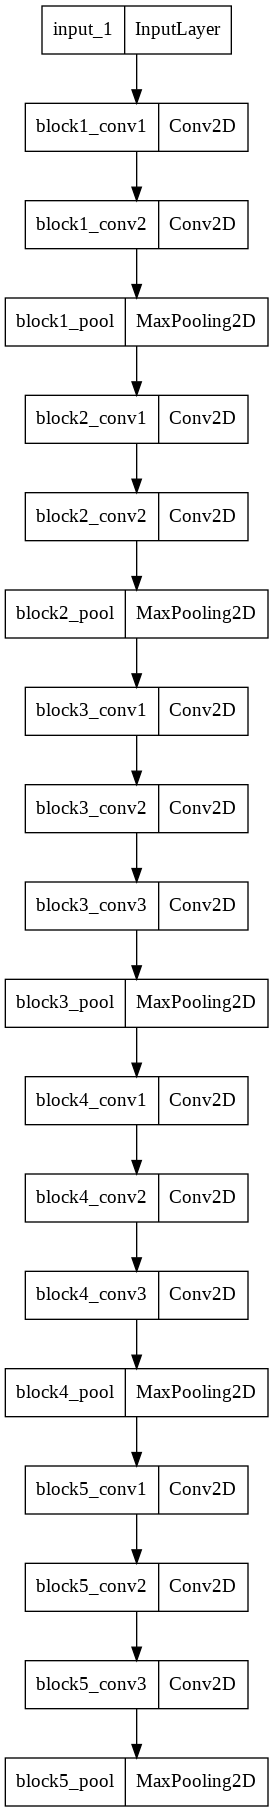

In [11]:
# Download and plot the VGG16 model
supernet = tfk.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(96, 96, 3)
)
supernet.summary()
tfk.utils.plot_model(supernet)

In [12]:
input_shape = (96, 96, 3)
epochs = 200

In [34]:
import tensorflow.keras.layers as tfkl

# Use the supernet as feature extractor
supernet.trainable = False

inputs = tfk.Input(shape=input_shape)
#x = tfkl.Resizing(64, 64, interpolation="bicubic")(inputs)
x = supernet(inputs)
x = tfkl.Flatten(name='Flattening')(x)
x = tfkl.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones"
)(x)
x = tfkl.Dropout(0.2, seed=seed)(x)
x = tfkl.Dense(
    256, 
    activation='relu',
    kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)
x = tfkl.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones"
)(x)
x = tfkl.Dropout(0.1, seed=seed)(x)

output_layer = tfkl.Dense(units=8, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='Output')(x)

# Connect input and output through the Model class
tl_model = tfk.Model(inputs=inputs, outputs=output_layer, name='VGG16-Improvement_DenseLayers')

# Compile the model
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
tl_model.summary()

Model: "VGG16-Improvement_DenseLayers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 Flattening (Flatten)        (None, 4608)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 4608)             18432     
 hNormalization)                                                 
                                                                 
 dropout_14 (Dropout)        (None, 4608)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               1179904   
                                     

In [35]:
for i, layer in enumerate(tl_model.get_layer('vgg16').layers):
   layer.trainable = False

for i, layer in enumerate(tl_model.get_layer('vgg16').layers):
   print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [36]:
# Train the model
#Create ALL desired callbacks
path = "/gdrive/My Drive/University/Artificial Neural Networks and Deep Learning Exercises/ANNDL-H1/Christian Spano Folder/Local Files/local_checkpoints/"
callbacks_selected = model_helper.createCallbacks(earlyStopping=True, checkPoints=True, patience=20, where_to_save=path, model_name="VGG16-Improvement")

#Fit the model
history = tl_model.fit(
    x = X_train,
    y = Y_train,
    batch_size = 128,
    epochs = epochs,
    validation_data = (X_val, Y_val),
    callbacks = callbacks_selected
).history

Epoch 1/200
29/29 [==============================] - 64s 168ms/step - loss: 2.0156 - accuracy: 0.3125 - precision_6: 0.3963 - recall_6: 0.1839 - val_loss: 1.8677 - val_accuracy: 0.2547 - val_precision_6: 1.0000 - val_recall_6: 0.0126
Epoch 2/200
29/29 [==============================] - 4s 144ms/step - loss: 1.3031 - accuracy: 0.5143 - precision_6: 0.6126 - recall_6: 0.3864 - val_loss: 1.6804 - val_accuracy: 0.3962 - val_precision_6: 0.9375 - val_recall_6: 0.0472
Epoch 3/200
29/29 [==============================] - 4s 143ms/step - loss: 1.0652 - accuracy: 0.6153 - precision_6: 0.7030 - recall_6: 0.4851 - val_loss: 1.5900 - val_accuracy: 0.4340 - val_precision_6: 0.8947 - val_recall_6: 0.1069
Epoch 4/200
29/29 [==============================] - 4s 155ms/step - loss: 0.9174 - accuracy: 0.6710 - precision_6: 0.7674 - recall_6: 0.5394 - val_loss: 1.5261 - val_accuracy: 0.4465 - val_precision_6: 0.8226 - val_recall_6: 0.1604
Epoch 5/200
29/29 [==============================] - 4s 143ms/step 

# Save the model

In [37]:
model_helper.save_model(tl_model, "VGG16-Improving_BatchNormalization")

In [38]:
model = model_helper.load_model("VGG16-Improving_BatchNormalization")
model.summary()

Model: "VGG16-Improvement_DenseLayers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 Flattening (Flatten)        (None, 4608)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 4608)             18432     
 hNormalization)                                                 
                                                                 
 dropout_14 (Dropout)        (None, 4608)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               1179904   
                                     

12/12 [==============================] - 1s 34ms/step
Accuracy: 0.6469
Precision: 0.6264
Recall: 0.6106
F1: 0.6089


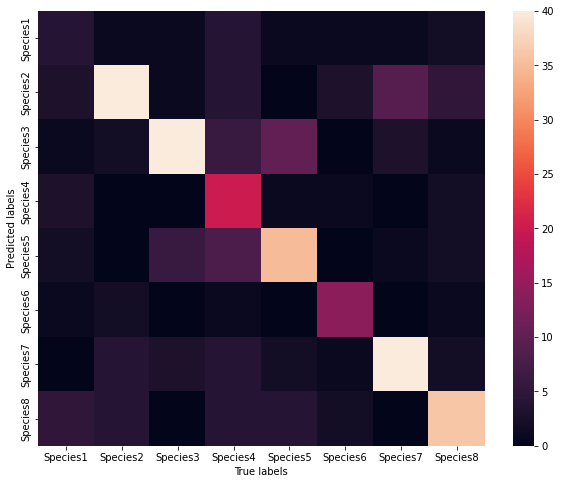

BABABA


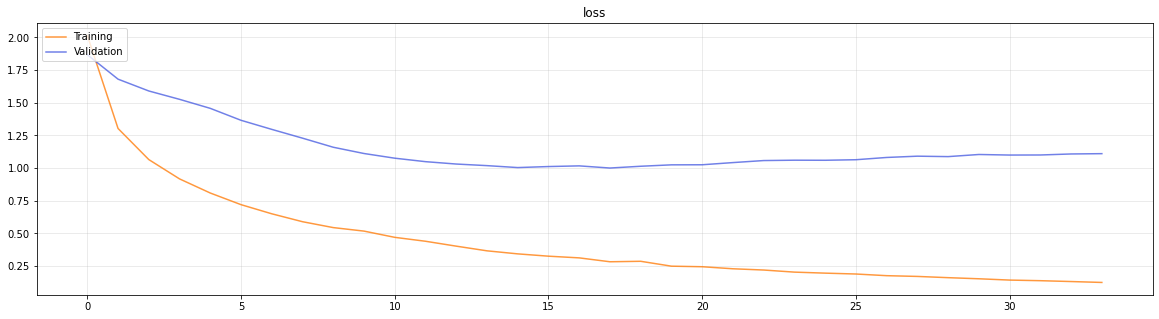

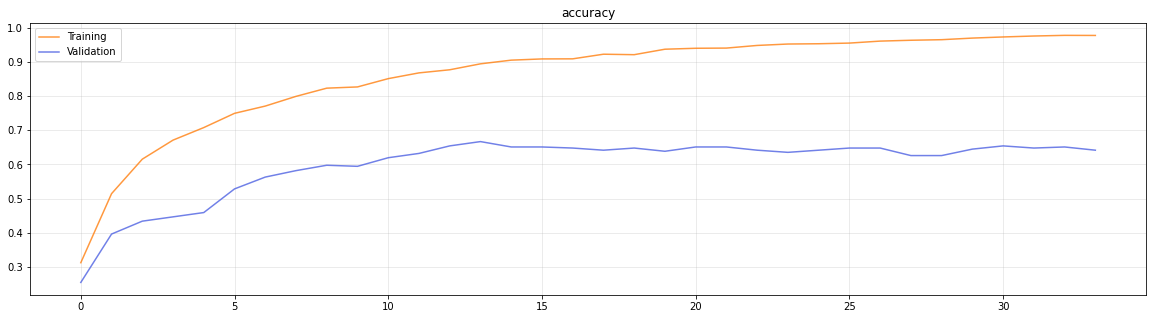

In [39]:
model_helper.show_confusion_matrix(X_test, Y_test)
model_helper.plot_phase_train_vs_validation(history)